# Titanic - Machine Learning from Disaster!

## This is my first notebook developed for Kaggle Competition
---

In [120]:
import zipfile
import os

if not "train.csv" in os.listdir(os.getcwd()):
    with zipfile.ZipFile("./titanic.zip", 'r') as zf:
        zf.extractall("./")

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv("./train.csv")

In [123]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [124]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [126]:
len(df["Cabin"].unique())

148

In [127]:
df[~df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [128]:
df[df["Cabin"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [129]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [130]:
df["sexo"] = df.apply(lambda x: 1 if x["Sex"]=="male" else 0, axis=1)

In [131]:
homens = df[df["sexo"] == 1]
mulheres = df[df["sexo"] == 0]

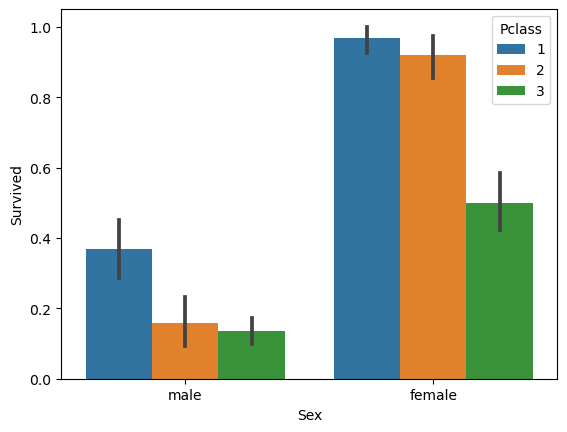

In [132]:
ax = sns.barplot(data=df, x="Sex", y="Survived", hue="Pclass")

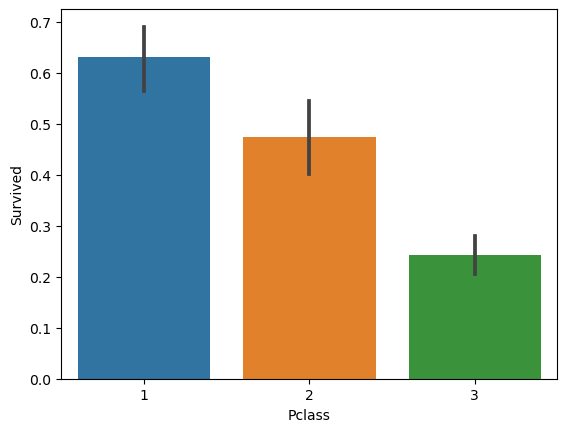

In [133]:
ax = sns.barplot(data=df, x="Pclass", y="Survived")

In [134]:
print("percentage of women who survived: {:.2f} %".format(sum(mulheres["Survived"])/len(mulheres)*100))
print("percentage of men who survived: {:.2f} %".format(sum(homens["Survived"])/len(homens)*100))

percentage of women who survived: 74.20 %
percentage of men who survived: 18.89 %


In [135]:
df["sexo"] = df.apply(lambda x: 1 if x["Sex"]=="male" else 0, axis=1)

In [136]:
homens = df[df["sexo"] == 1]
mulheres = df[df["sexo"] == 0]

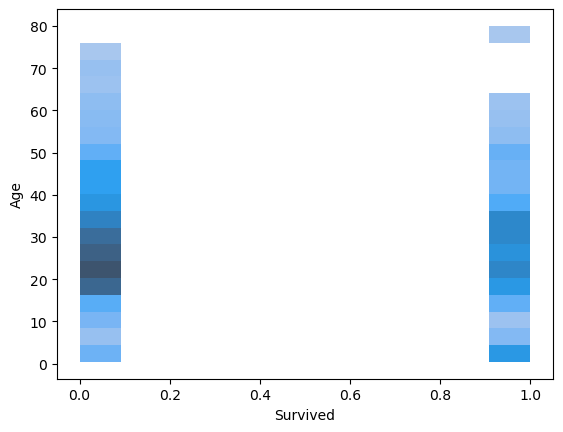

In [137]:
ax = sns.histplot(data=df, x="Survived", y="Age")

In [138]:
df['Age'].fillna(round(df['Age'].mean(),0), inplace=True)

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  sexo         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [140]:
df = df.loc[df["Embarked"].dropna().index, :].copy()

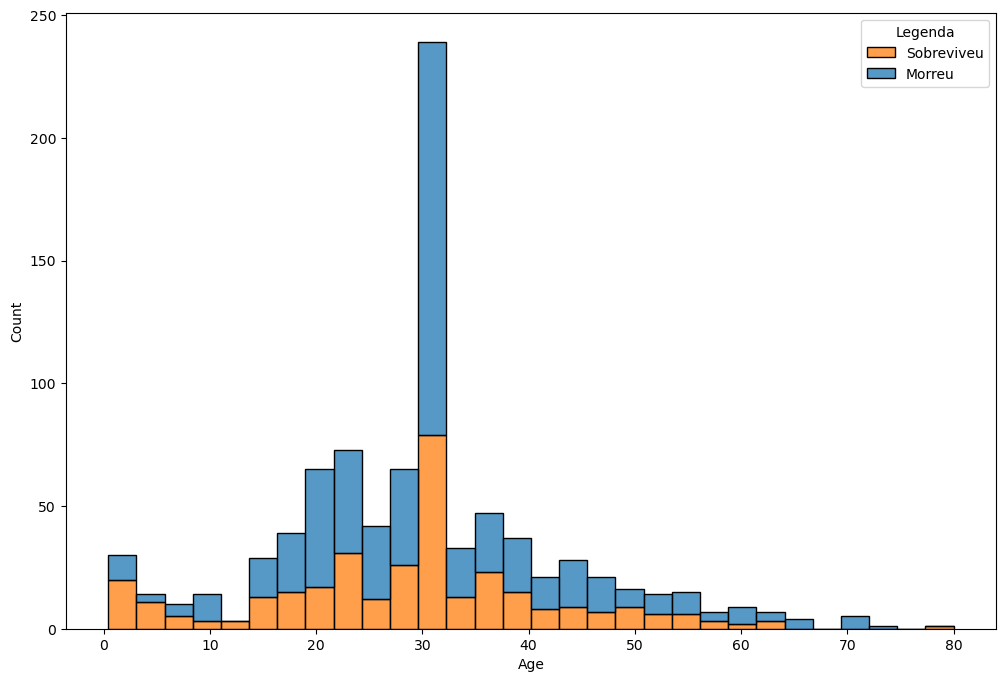

In [141]:
fig = plt.figure(figsize=(12, 8))
ax = sns.histplot(data=df, x="Age", hue="Survived", multiple="stack", legend=False).legend(title="Legenda", labels=["Sobreviveu", "Morreu"])

In [142]:
pd.cut(df["Age"], bins=20)

0      (20.315, 24.294]
1       (36.231, 40.21]
2      (24.294, 28.273]
3      (32.252, 36.231]
4      (32.252, 36.231]
             ...       
886    (24.294, 28.273]
887    (16.336, 20.315]
888    (28.273, 32.252]
889    (24.294, 28.273]
890    (28.273, 32.252]
Name: Age, Length: 889, dtype: category
Categories (20, interval[float64, right]): [(0.34, 4.399] < (4.399, 8.378] < (8.378, 12.357] < (12.357, 16.336] ... (64.084, 68.063] < (68.063, 72.042] < (72.042, 76.021] < (76.021, 80.0]]

In [143]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  , 30.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [144]:
bins = pd.IntervalIndex.from_tuples([
    (0., 5.), (5., 10.), (10., 15.),
    (15., 20.), (20., 25.), (25., 30.),
    (30., 35.), (35., 40.), (40., 45.),
    (45., 50.), (50., 55.), (55., 60.),
    (60., 65.), (65., 70.), (70., 75.),
    (75., 80.)])
df["classe_cut"] = pd.cut(
    df["Age"], range(0, 81, 5), include_lowest=False   
)

In [145]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sexo,classe_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(20, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,"(35, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(25, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,"(30, 35]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,"(30, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,"(25, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,"(15, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,0,"(25, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,"(25, 30]"


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    object  
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        202 non-null    object  
 11  Embarked     889 non-null    object  
 12  sexo         889 non-null    int64   
 13  classe_cut   889 non-null    category
dtypes: category(1), float64(2), int64(6), object(5)
memory usage: 98.9+ KB


In [147]:
df.drop(["Cabin"], axis=1, inplace=True)

In [148]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sexo,classe_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,"(20, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,"(35, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,"(25, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,"(30, 35]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,"(30, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,"(25, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,"(15, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,0,"(25, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,"(25, 30]"


# Aplicando o Modelo RandomForestClassifier
---

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, r2_score

In [150]:
train_df = df.copy()

In [151]:
label_enc = LabelEncoder()
train_df["Sex"] = label_enc.fit_transform(train_df["Sex"])
train_df["Embarked"] = label_enc.fit_transform(train_df["Embarked"])

In [152]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sexo,classe_cut
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,1,"(20, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0,"(35, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,0,"(25, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,0,"(30, 35]"
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,1,"(30, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2,1,"(25, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,0,"(15, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,2,0,"(25, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0,1,"(25, 30]"


In [153]:
features = df.select_dtypes([np.float64, np.int64, np.int32]).drop("Survived", axis=1).columns

In [154]:
features

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sexo'], dtype='object')

In [155]:
features.drop(["PassengerId", "sexo"])

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [156]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sexo,classe_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,"(20, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,"(35, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,"(25, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,"(30, 35]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,"(30, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,"(25, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,"(15, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,0,"(25, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,"(25, 30]"


In [157]:
X = df.select_dtypes([np.float64, np.int64, np.int32]).drop("Survived", axis=1).drop("PassengerId", axis=1)
y = train_df["Survived"]

In [158]:
mmscaler = MinMaxScaler(feature_range=(-1, 1))

In [177]:
df.select_dtypes([np.float64, np.int64, np.int32]).drop("Survived", axis=1).drop("PassengerId", axis=1).columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'sexo'], dtype='object')

In [159]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,sexo,classe_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,"(20, 25]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,"(35, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,"(25, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,"(30, 35]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,"(30, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,"(25, 30]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,"(15, 20]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,0,"(25, 30]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,"(25, 30]"


In [160]:
X = mmscaler.fit_transform(X)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [162]:
rfc = RandomForestClassifier()

In [163]:
rfc.fit(X=X_train, y=y_train)

RandomForestClassifier()

In [164]:
y_predict = rfc.predict(X_test)

In [165]:
accuracy_score(y_true=y_test, y_pred=y_predict)

0.8052434456928839

In [166]:
cv = cross_validate(estimator=RandomForestClassifier(), X=X, y=y)

In [167]:
cv["test_score"].mean()

0.8054275376118835

In [168]:
cv

{'fit_time': array([0.08103371, 0.07849002, 0.08009243, 0.08137488, 0.08055162]),
 'score_time': array([0.00400281, 0.00499988, 0.00450897, 0.00399971, 0.00350642]),
 'test_score': array([0.76966292, 0.79775281, 0.85955056, 0.76966292, 0.83050847])}

In [169]:
X

array([[ 1.        , -0.45765268, -0.75      , -1.        , -0.97169788,
         1.        ],
       [-1.        , -0.05554159, -0.75      , -1.        , -0.72172853,
        -1.        ],
       [ 1.        , -0.35712491, -1.        , -1.        , -0.96906286,
        -1.        ],
       ...,
       [ 1.        , -0.25659713, -0.75      , -0.33333333, -0.9084573 ,
        -1.        ],
       [-1.        , -0.35712491, -1.        , -1.        , -0.8828878 ,
         1.        ],
       [ 1.        , -0.20633325, -1.        , -1.        , -0.96974601,
         1.        ]])

In [175]:
estimator = rfc.estimators_[0]

In [176]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image

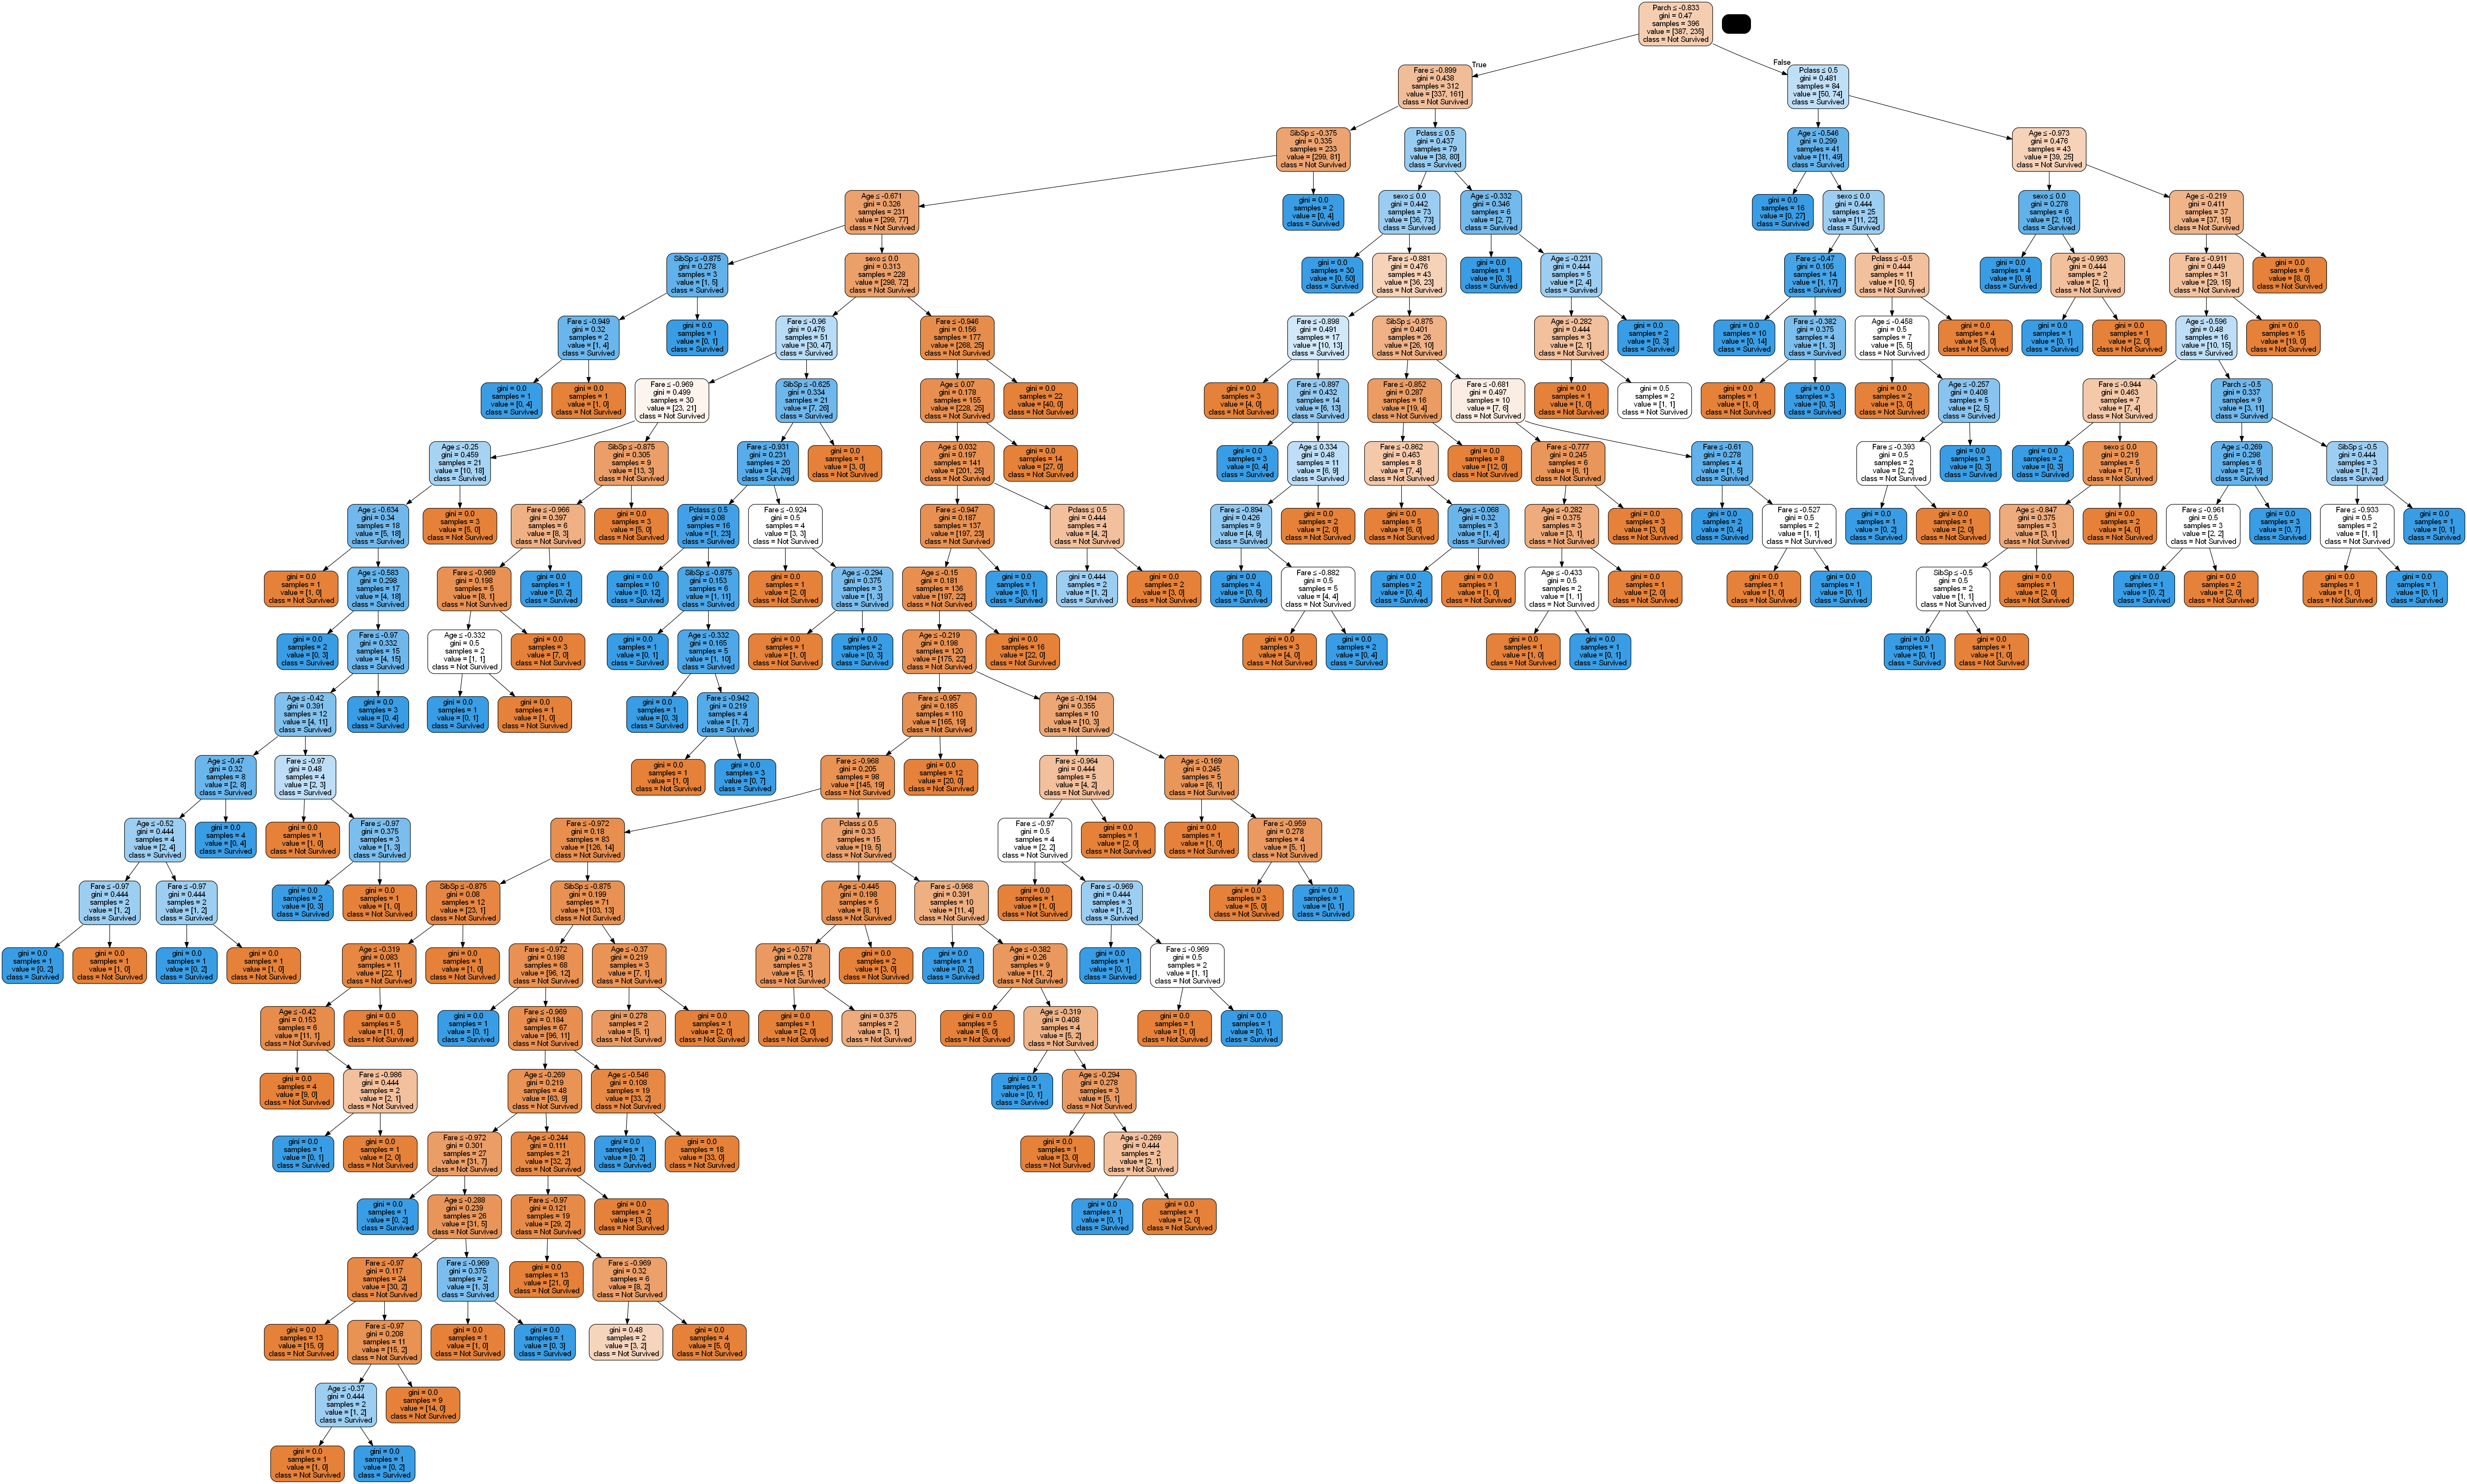

In [178]:
# Export the tree to a DOT file
dot_data = export_graphviz(estimator, out_file=None, 
                           feature_names=df.select_dtypes([np.float64, np.int64, np.int32]).drop("Survived", axis=1).drop("PassengerId", axis=1).columns,
                           class_names=['Not Survived', 'Survived'],
                           filled=True, rounded=True, 
                           special_characters=True)

# Use pydotplus to create a graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())